In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [10]:
data = pd.read_csv('proctatinium_data.csv')
t_values = np.array(data["time"], dtype=float)
count_values = np.array(data["count_rate"], dtype=float)

In [11]:
data

,time,count_rate
0,0,32
1,5,28
2,10,29
3,15,28
4,20,25
...,...,...
78,390,1
79,395,1
80,400,2
81,405,2


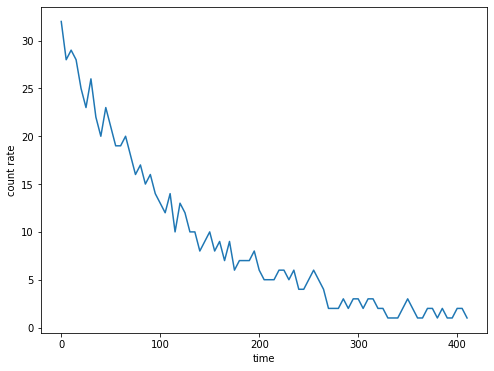

In [15]:
plt.figure(figsize=(8,6))
plt.plot(data.time,data.count_rate)
plt.ylabel('count rate')
plt.xlabel('time')
plt.show()

$$N(t) = N_0e^{(-\lambda t)}$$

In [69]:
def N(x,lmbda):
    return 32*np.exp(-lmbda*x)

def estimate_parameters(f,initial = 1, trials = 10000):
    result_trials = []
    lmbda = initial
    for _ in range(trials):
        noisy_data = []
        for y in data.count_rate:
            noisy_data.append(y+np.random.normal())
        lmbda, _ = scipy.optimize.curve_fit(f,data.time,noisy_data,1)
        result_trials.append(float(lmbda))
    return result_trials

In [70]:
result_trials = estimate_parameters(N)

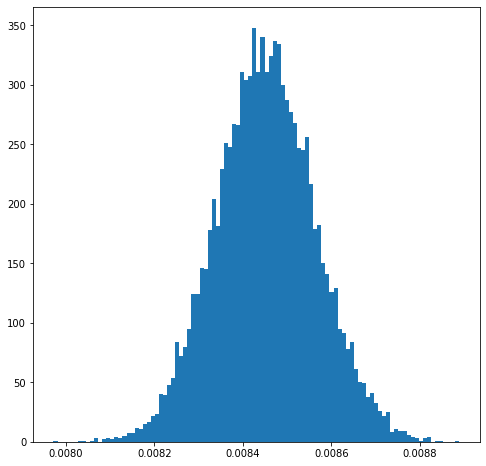

In [71]:
plt.figure(figsize=(8,8))
plt.hist(result_trials,bins=100)
plt.show()

$$t_{half-life} = \frac{\ln 2}{\lambda}$$

In [72]:
print('error is', 77 - np.log(2)/np.mean(result_trials))

error is -5.010702042759377


This is not an MCMC method because each lambda at each trial is calculated independently from previous estimates. MCMC method necessitates the calculation at the next step to depend on the previous one.